In [7]:
from flight_revenue_simulator import simulate_revenue, score_me

In [8]:
def pricing_function(days_left, tickets_left, demand_level):
    """Sample pricing function"""
    price = demand_level - 10
    return price

In [9]:
simulate_revenue(days_left=7, tickets_left=50, pricing_function=pricing_function, verbose=True)

7 days before flight: Started with 50 seats. Demand level: 100. Price set to $90. Sold 10 tickets. Daily revenue is 904. Total revenue-to-date is 904. 40 seats remaining
6 days before flight: Started with 40 seats. Demand level: 192. Price set to $182. Sold 10 tickets. Daily revenue is 1820. Total revenue-to-date is 2724. 30 seats remaining
5 days before flight: Started with 30 seats. Demand level: 144. Price set to $134. Sold 10 tickets. Daily revenue is 1343. Total revenue-to-date is 4067. 20 seats remaining
4 days before flight: Started with 20 seats. Demand level: 109. Price set to $99. Sold 10 tickets. Daily revenue is 985. Total revenue-to-date is 5052. 10 seats remaining
3 days before flight: Started with 10 seats. Demand level: 132. Price set to $122. Sold 10 tickets. Daily revenue is 1216. Total revenue-to-date is 6268. 0 seats remaining
This flight is booked full.
Total Revenue: $6268


6267.620327689507

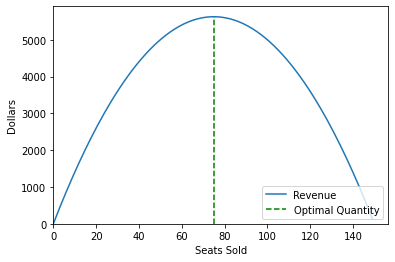

In [10]:
import matplotlib.pyplot as plt
import numpy as np

demand_level = 150
# only plot quantities up to demand_level. That's point where price becomes 0
revenue = [(demand_level - q) * q for q in range(demand_level)]

# Make primary plot
plt.plot(revenue, label="Revenue")
plt.xlabel("Seats Sold")
plt.ylabel("Dollars")
plt.ylim(ymin=0)
plt.xlim(xmin=0)

# Show the revenue maximizing quantity
optimal_q = np.argmax(revenue)
plt.vlines(x=optimal_q, ymin=0, ymax=max(revenue), color='green', linestyle="--", label="Optimal Quantity")

plt.legend(loc='lower right')
plt.show()

In [17]:
n_demand_levels = 11
min_demand_level = 100
max_demand_level = 200
demand_levels = np.linspace(min_demand_level, max_demand_level, n_demand_levels)

max_tickets = 200
max_days = 150

# Q indices are: n_sold in day, tickets_left to start day, demand_level, days_left
Q = np.zeros([max_tickets, max_tickets, n_demand_levels, max_days])
# V indices are: n_left and n_days
V = np.zeros([max_tickets, max_days])
Q.shape, V.shape

((200, 200, 11, 150), (200, 150))

In [18]:
for tickets_left in range(max_tickets):
    for tickets_sold in range(tickets_left+1): # add 1 to offset 0 indexing. Allow selling all tickets
        for demand_index, demand_level in enumerate(demand_levels):
            # Never set negative prices
            price = max(demand_level - tickets_sold, 0)
            Q[tickets_sold, tickets_left, demand_index, 0] = price * tickets_sold

    
    # For each demand_level, choose the optimum number to sell. Output of this is array .of size n_demand_levels
    revenue_from_best_quantity_at_each_demand_level = Q[:, tickets_left, :, 0].max(axis=0)
    print(f"revenue_from_best_quantity_at_each_demand_level {revenue_from_best_quantity_at_each_demand_level}")
    # take the average, since we don't know demand level ahead of time and all are equally likely
    V[tickets_left, 0] = revenue_from_best_quantity_at_each_demand_level.mean()

revenue_from_best_quantity_at_each_demand_level [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
revenue_from_best_quantity_at_each_demand_level [ 99. 109. 119. 129. 139. 149. 159. 169. 179. 189. 199.]
revenue_from_best_quantity_at_each_demand_level [196. 216. 236. 256. 276. 296. 316. 336. 356. 376. 396.]
revenue_from_best_quantity_at_each_demand_level [291. 321. 351. 381. 411. 441. 471. 501. 531. 561. 591.]
revenue_from_best_quantity_at_each_demand_level [384. 424. 464. 504. 544. 584. 624. 664. 704. 744. 784.]
revenue_from_best_quantity_at_each_demand_level [475. 525. 575. 625. 675. 725. 775. 825. 875. 925. 975.]
revenue_from_best_quantity_at_each_demand_level [ 564.  624.  684.  744.  804.  864.  924.  984. 1044. 1104. 1164.]
revenue_from_best_quantity_at_each_demand_level [ 651.  721.  791.  861.  931. 1001. 1071. 1141. 1211. 1281. 1351.]
revenue_from_best_quantity_at_each_demand_level [ 736.  816.  896.  976. 1056. 1136. 1216. 1296. 1376. 1456. 1536.]
revenue_from_best_quantity_at_each_demand_le

revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.  8100.  9025.
 10000.]
revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.  8100.  9025.
 10000.]
revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.  8100.  9025.
 10000.]
revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.  8100.  9025.
 10000.]
revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.  8100.  9025.
 10000.]
revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.  8100.  9025.
 10000.]
revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.  8100.  9025.
 10000.]
revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.

revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.  8100.  9025.
 10000.]
revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.  8100.  9025.
 10000.]
revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.  8100.  9025.
 10000.]
revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.  8100.  9025.
 10000.]
revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.  8100.  9025.
 10000.]
revenue_from_best_quantity_at_each_demand_level [ 2500.  3025.  3600.  4225.  4900.  5625.  6400.  7225.  8100.  9025.
 10000.]
